# Solutions to the exercises

This notebook contains solutions to several problems that appear along the course.

## Exercise: plotting the karate club network with different node shapes

As indicated in the notebook, we use the functions `nx.draw_networkx_nodes()` and `nx.draw_networkx_edges()`. We have to specify the nodelist for each club and the lists of characteristics of the nodes that we want to plot. We also have to give the same `vmin` and `vmax` so that the colors are consistent globally.

(-1.1626755399369584,
 1.0863328821867442,
 -1.1996258565520268,
 1.1008244903808542)

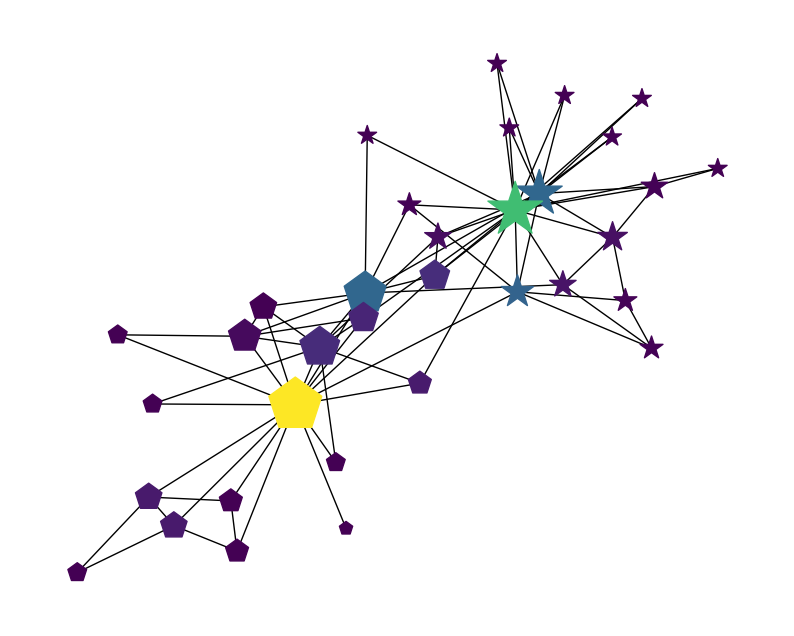

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
G = nx.karate_club_graph()
fr_layout = nx.fruchterman_reingold_layout(G)

plt.figure(figsize=(10,8))

betweenness_dict = dict(nx.betweenness_centrality(G))

vmin = np.min(list(betweenness_dict.values()))
vmax = np.max(list(betweenness_dict.values()))

deg_dict = dict(nx.degree(G))

nodes_Hi = [x for x in G.nodes() if G.nodes[x]['club']=='Mr. Hi']

node_betweenness_Hi = []
for node in nodes_Hi:
    node_betweenness_Hi.append(betweenness_dict[node])

node_deg_Hi = []
for node in nodes_Hi:
    node_deg_Hi.append(deg_dict[node])
node_deg_Hi = np.array(node_deg_Hi)
    
nx.draw_networkx_nodes(G,
                       pos=fr_layout,
                       nodelist=nodes_Hi,
                       node_color=node_betweenness_Hi,
                       node_size=100*node_deg_Hi,
                       vmin=vmin,
                       vmax=vmax,
                       node_shape='p') 

nodes_Of = [x for x in G.nodes() if G.nodes[x]['club']=='Officer']

node_betweenness_Of = []
for node in nodes_Of:
    node_betweenness_Of.append(betweenness_dict[node])

node_deg_Of = []
for node in nodes_Of:
    node_deg_Of.append(deg_dict[node])
node_deg_Of = np.array(node_deg_Of)
    
nx.draw_networkx_nodes(G,
                       pos=fr_layout,
                       nodelist=nodes_Of,
                       node_color=node_betweenness_Of,
                       node_size=100*node_deg_Of,
                       vmin=vmin,
                       vmax=vmax,
                       node_shape='*') 


nx.draw_networkx_edges(G,
                       pos=fr_layout) 

plt.axis('off')

## Exercise: plotting the karate club network with different symbols and line styles

Plot the Karate club network so that you show the node betweenness as the color of the nodes, the degree as their size and belonging to one of the two clubs in the shape of the nodes. Regarding the edges, use the color to show the edge betweenness centrality, the width to show the weight and plot with different styles edges between members of Mr. Hi's club, edges between members od Officer's club and edges between members of different clubs.

(-0.5504528379451197,
 0.6213367216825408,
 -1.008846817409509,
 1.1535079929491894)

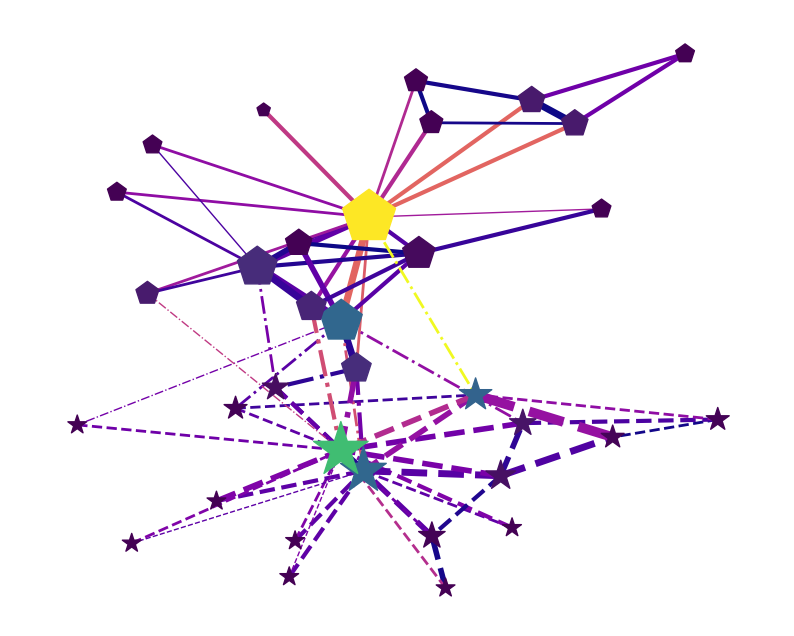

In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
G = nx.karate_club_graph()
fr_layout = nx.fruchterman_reingold_layout(G)

plt.figure(figsize=(10,8))

betweenness_dict = dict(nx.betweenness_centrality(G))

vmin = np.min(list(betweenness_dict.values()))
vmax = np.max(list(betweenness_dict.values()))

deg_dict = dict(nx.degree(G))

nodes_Hi = [x for x in G.nodes() if G.nodes[x]['club']=='Mr. Hi']

node_betweenness_Hi = []
for node in nodes_Hi:
    node_betweenness_Hi.append(betweenness_dict[node])

node_deg_Hi = []
for node in nodes_Hi:
    node_deg_Hi.append(deg_dict[node])
node_deg_Hi = np.array(node_deg_Hi)
    
nx.draw_networkx_nodes(G,
                       pos=fr_layout,
                       nodelist=nodes_Hi,
                       node_color=node_betweenness_Hi,
                       node_size=100*node_deg_Hi,
                       vmin=vmin,
                       vmax=vmax,
                       node_shape='p') 

nodes_Of = [x for x in G.nodes() if G.nodes[x]['club']=='Officer']

node_betweenness_Of = []
for node in nodes_Of:
    node_betweenness_Of.append(betweenness_dict[node])

node_deg_Of = []
for node in nodes_Of:
    node_deg_Of.append(deg_dict[node])
node_deg_Of = np.array(node_deg_Of)
    
nx.draw_networkx_nodes(G,
                       pos=fr_layout,
                       nodelist=nodes_Of,
                       node_color=node_betweenness_Of,
                       node_size=100*node_deg_Of,
                       vmin=vmin,
                       vmax=vmax,
                       node_shape='*') 

edge_betweenness_dict = nx.edge_betweenness_centrality(G)
edge_vmin = np.min(list(edge_betweenness_dict.values()))
edge_vmax = np.max(list(edge_betweenness_dict.values()))
edge_cmap_chosen = mpl.colormaps['plasma']

edge_weight_dict = {}
for edge in G.edges():
    edge_weight_dict[edge] = G.edges[edge]['weight']

edges_Hi = []
edges_Of = []
edges_Hi_Of = []
for edge in G.edges():
    fr,to = edge
    if G.nodes[fr]['club']==G.nodes[to]['club']:
        if G.nodes[fr]['club']=='Mr. Hi':
            edges_Hi.append(edge)
        else:
            edges_Of.append(edge)
    else:
        edges_Hi_Of.append(edge)

betweenness_Hi = []
weight_Hi = []
for edge in edges_Hi:
    betweenness_Hi.append(edge_betweenness_dict[edge])
    weight_Hi.append(edge_weight_dict[edge])
    
nx.draw_networkx_edges(G,
                       edgelist=edges_Hi,
                       pos=fr_layout,
                       edge_color=betweenness_Hi,
                       edge_vmin=edge_vmin,
                       edge_vmax=edge_vmax,
                       edge_cmap=edge_cmap_chosen,
                       width=weight_Hi,
                       style='-') 
betweenness_Of = []
weight_Of = []
for edge in edges_Of:
    betweenness_Of.append(edge_betweenness_dict[edge])
    weight_Of.append(edge_weight_dict[edge])

nx.draw_networkx_edges(G,
                       edgelist=edges_Of,
                       pos=fr_layout,
                       edge_color=betweenness_Of,
                       edge_vmin=edge_vmin,
                       edge_vmax=edge_vmax,
                       edge_cmap=edge_cmap_chosen,
                       width=weight_Of,
                       style='--')

betweenness_Hi_Of = []
weight_Hi_Of = []
for edge in edges_Hi_Of:
    betweenness_Hi_Of.append(edge_betweenness_dict[edge])
    weight_Hi_Of.append(edge_weight_dict[edge])

nx.draw_networkx_edges(G,
                       edgelist=edges_Hi_Of,
                       pos=fr_layout,
                       edge_color=betweenness_Hi_Of,
                       edge_vmin=edge_vmin,
                       edge_vmax=edge_vmax,
                       edge_cmap=edge_cmap_chosen,
                       width=weight_Hi_Of,
                       style='-.')

plt.axis('off')